# **Import Needed Modules**

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, classification_report

# **Exploratory Data Analysis and Wrangling**

## Read data

In [222]:
train_df = pd.read_csv('/kaggle/input/bank-term-deposit-predictions/train.csv')
test_df = pd.read_csv('/kaggle/input/bank-term-deposit-predictions/test.csv')

## Get sample

In [223]:
# Train Data Sample
train_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [224]:
test_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


## Get data informaion

In [132]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Age Feature
- The age of the customer.

In [133]:
# Get statistical analysis
train_df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

    - The most prevalent age range is [30 - 47]

## Job Feature
- The occupation/employment status of the customer.

In [135]:
train_df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

#### I'll rename "unknown" values with "others"

In [136]:
train_df['job'] = train_df['job'].replace('unknown', 'others')
train_df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
others            288
Name: count, dtype: int64

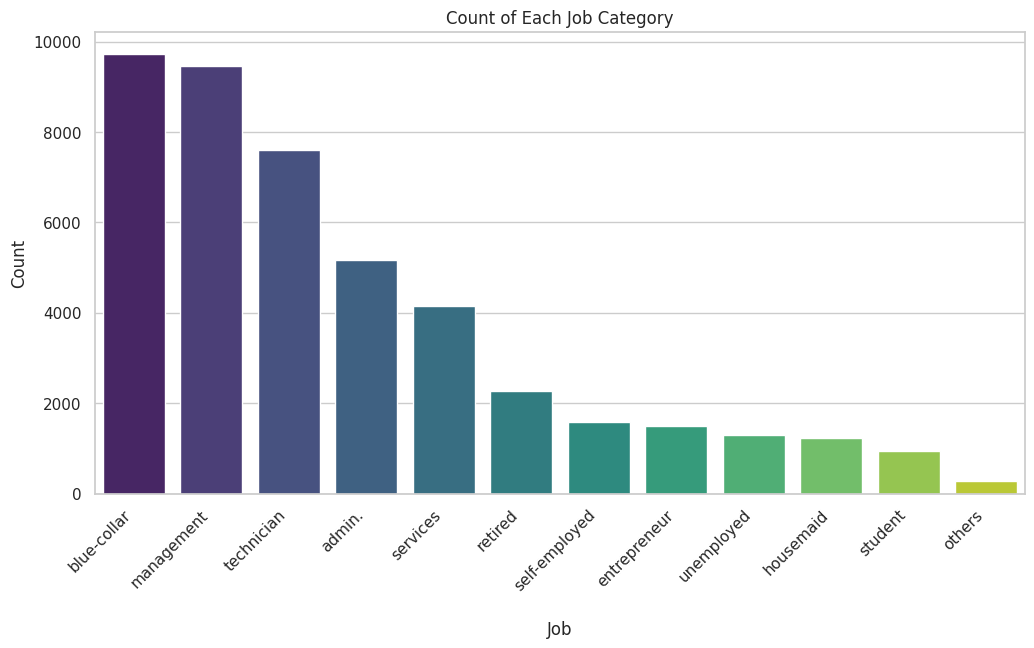

In [137]:
# Define counts
job_counts = train_df['job'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Job Category')
plt.xlabel('\nJob')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### Also, Don't forget to rename these values in test data.

In [138]:
test_df['job'] = test_df['job'].replace('unknown', 'others')
test_df['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
others            38
Name: count, dtype: int64

## Marital-Status Feature
- The marital status of the customer.

## Educational Feature
- The education level attained by the customer.

In [141]:
train_df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

### I'll rename "unknown" values with "others" 

In [142]:
train_df['education'] = train_df['education'].replace('unknown', 'others')
train_df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
others        1857
Name: count, dtype: int64

### Also, Don't forget to rename these values in test data.

In [144]:
test_df['education'] = test_df['education'].replace('unknown', 'others')
test_df['education'].value_counts()

education
secondary    2306
tertiary     1350
primary       678
others        187
Name: count, dtype: int64

## Credit in Default Feature
- Whether the customer has credit in default or not.

### This feature is worthless, the "no" values is so poor, so I'll drop it.

In [147]:
train_df.drop(columns=['default'], inplace=True)

### Also, don't forget drop this column from test data

In [148]:
test_df.drop(columns=['default'], inplace=True)

## Balance Feature
- The balance in the customer's account.

In [149]:
train_df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

/tmp/ipykernel_42/1190658190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(train_df['balance'], palette='viridis')


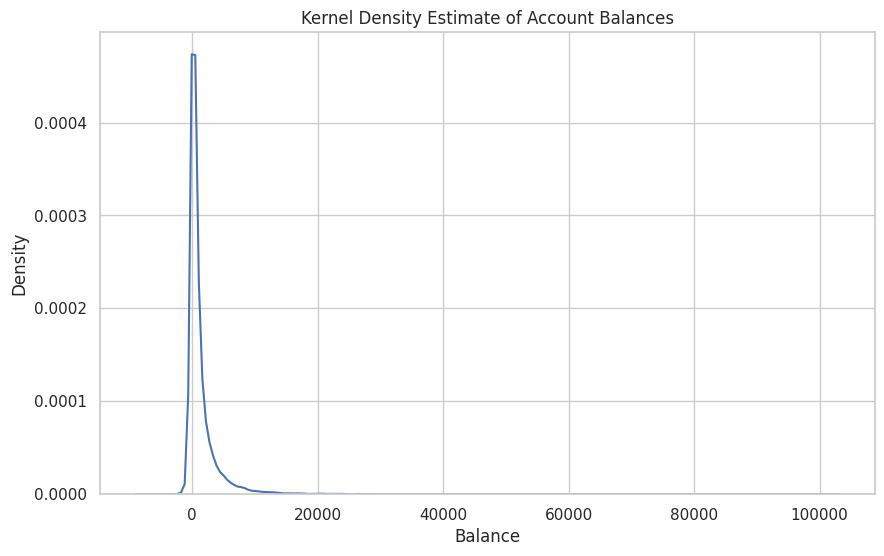

In [150]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(train_df['balance'], palette='viridis')

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

### Check for values under zero

In [151]:
train_df[train_df['balance'] <= 0]['balance'].count()

7280

### Define the percentile threshold for outliers - 95%

- ### The maximum value of 102127 is considerably higher than the 95th percentile (5768).
- ### I'll drop the values that above 5768.

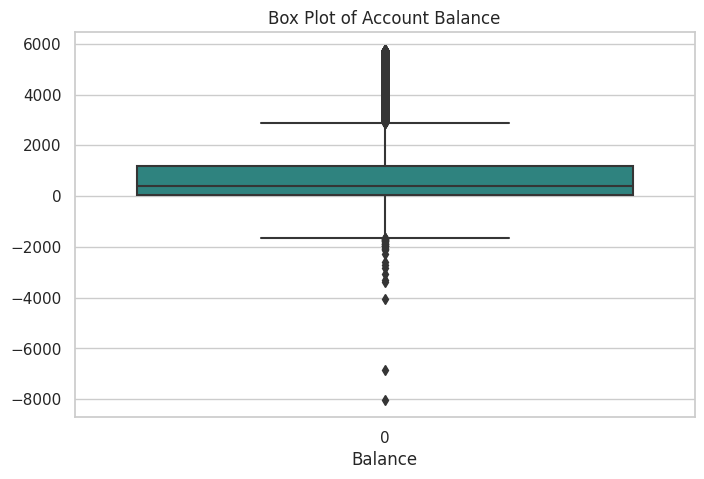

In [155]:
# Define figure size
plt.figure(figsize=(8, 5))

# Plot the boxplot
sns.boxplot(train_df['balance'], palette='viridis')

# Add labels and title
plt.title('Box Plot of Account Balance')
plt.xlabel('Balance')

# Show the plot
plt.show()

### Define the percentile threshold for outliers - 5%

- ### The minimum value of -8019 is considerably lower than the 5th percentile (-191).
- ### I'll drop the values that under -191.

In [157]:
train_df = train_df[train_df['balance'] > -191]

## Housing Loan Feature
- Whether the customer has a housing loan or not.

## Loan Feature
- Whether the customer has a loan or not.

## Contact Feature
- Type of communication used to contact customers

### I'll rename "unknown" values with "others" 

In [165]:
train_df['contact'] = train_df['contact'].replace('unknown', 'others')
train_df['contact'].value_counts()

contact
cellular     26530
others       11625
telephone     2645
Name: count, dtype: int64

### Also, Don't forget to rename these values in test data.

In [167]:
test_df['contact'] = test_df['contact'].replace('unknown', 'others')
test_df['contact'].value_counts()

contact
cellular     2896
others       1324
telephone     301
Name: count, dtype: int64

## Day Feature
- Day of the month when customers were last contacted

## Month Feature
- last contact month of year.

## Duration Feature
- last contact duration, in seconds

## Campaign Feature
- number of contacts performed during this campaign and for this client

## Passed Days
- number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted)

In [176]:
# Get the values that doesn't -1
filtered_data = train_df[train_df['pdays'] != -1]

In [177]:
# Get statistical summary
filtered_data['pdays'].describe()

count    7494.000000
mean      224.477315
std       115.930819
min         1.000000
25%       131.000000
50%       195.000000
75%       326.000000
max       871.000000
Name: pdays, dtype: float64

## Previous Contacts
- number of contacts performed before this campaign and for this client.

### - This feature is useless, the most of values have 0 value.
- I'll drop it

In [180]:
train_df.drop(columns=['previous'], inplace=True)

### Also, don't forget drop this column from test data

In [181]:
test_df.drop(columns=['previous'], inplace=True)

## Previous Outcome
- outcome of the previous marketing campaign

In [182]:
train_df['poutcome'].value_counts()

poutcome
unknown    33311
failure     4405
other       1678
success     1406
Name: count, dtype: int64

### - This feature is useless, the most of values are unknowns.
- I'll drop it

In [184]:
train_df.drop(columns=['poutcome'], inplace=True)

### Also, don't forget drop this column from test data

In [185]:
test_df.drop(columns=['poutcome'], inplace=True)

## Target Column
- has the client subscribed a term deposit

## **Create a Label Encoder model to convert the categorical values into numeric**

In [225]:
train_df = train_df.apply(LabelEncoder().fit_transform)

In [226]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


### Also, don't forget encode test data

In [190]:
test_df = test_df.apply(LabelEncoder().fit_transform)

In [191]:
test_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,11,11,1,1,1475,0,0,0,18,10,75,0,0,0
1,14,8,1,2,2030,1,1,0,10,8,216,0,228,0
2,16,4,2,3,1303,1,0,0,15,0,181,0,219,0
3,11,4,1,3,1352,1,1,1,2,6,195,3,0,0
4,40,1,1,2,274,1,0,1,4,8,222,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,8,1,2,119,1,0,0,29,5,325,4,0,0
4517,38,7,1,3,0,1,1,1,8,8,149,0,0,0
4518,38,10,1,2,558,0,0,0,18,1,147,10,0,0
4519,9,1,1,2,1187,0,0,0,5,3,125,3,140,0


## Get Features Correlation

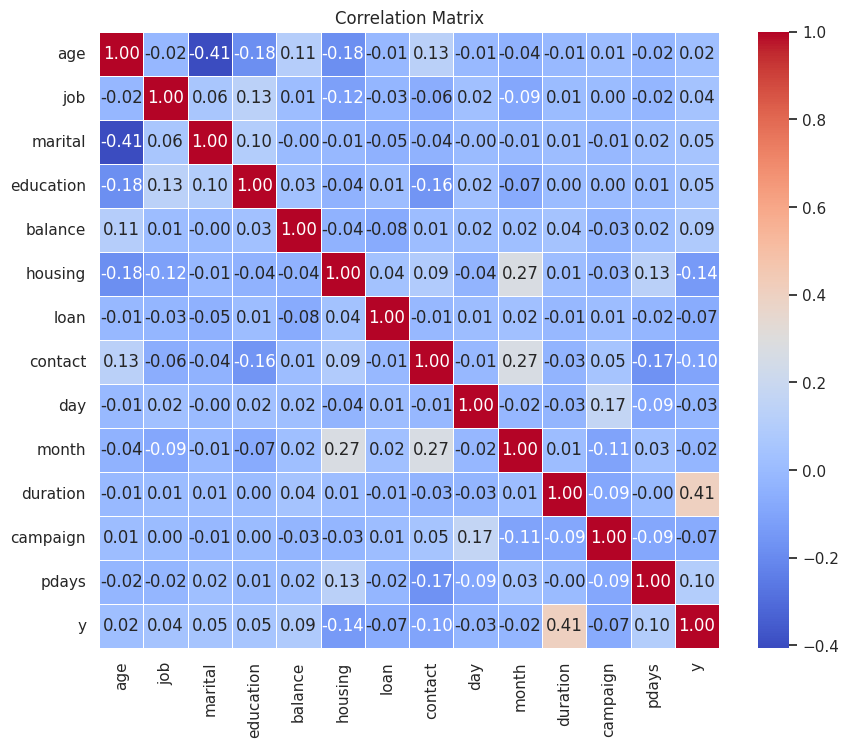

In [192]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# **Preprocessing**

## Define Features X and Target y

In [193]:
# Train Data
train_df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,40,4,1,3,2310,1,0,1,4,8,261,0,0,0
1,26,10,2,2,219,1,0,1,4,8,151,0,0,0
2,15,2,1,2,192,1,1,1,4,8,76,0,0,0
3,29,1,1,0,1694,1,0,1,4,8,92,0,0,0
4,15,5,2,0,191,0,0,1,4,8,198,0,0,0


In [194]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

In [195]:
# Test Data
test_df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,11,11,1,1,1475,0,0,0,18,10,75,0,0,0
1,14,8,1,2,2030,1,1,0,10,8,216,0,228,0
2,16,4,2,3,1303,1,0,0,15,0,181,0,219,0
3,11,4,1,3,1352,1,1,1,2,6,195,3,0,0
4,40,1,1,2,274,1,0,1,4,8,222,0,0,0


In [196]:
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

# **Machine Learning Algorithms**

## Logistic Regression

In [197]:
# Logistic Regression model
lr = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)

# Train the model
lr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [198]:
# Train Score
print(lr.score(X_train, y_train))

0.8885539215686274


In [199]:
# Test Score
print(lr.score(X_test, y_test))

0.8854235788542358


In [200]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

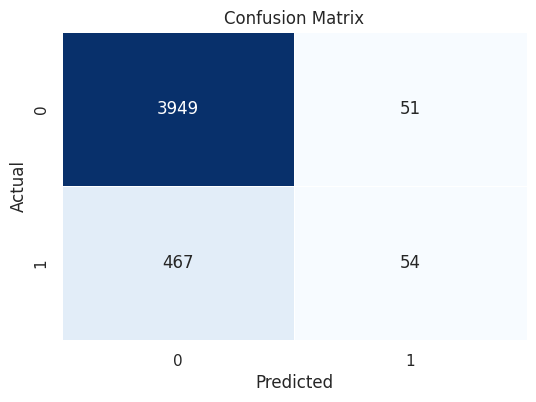

In [201]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [202]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4000
           1       0.51      0.10      0.17       521

    accuracy                           0.89      4521
   macro avg       0.70      0.55      0.56      4521
weighted avg       0.85      0.89      0.85      4521



## SVC

In [ ]:
# SVC model
# svc = SVC(C=5, gamma='auto')

# # Train the model
# svc.fit(X_train, y_train)

In [ ]:
# # Train Score
# print(svc.score(X_train, y_train))

In [ ]:
# # Test Score
# print(svc.score(X_test, y_test))

In [ ]:
# # Make predictions on the test set
# y_pred = svc.predict(X_test)

In [ ]:
# # Create a confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Visualize the confusion matrix with a heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

In [ ]:
# # Classification Report
# print(classification_report(y_test, y_pred))

## K-Nearest Neighbor

In [ ]:
# # K-Neighbors Classifier
# knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# # Train the model
# knn.fit(X_train, y_train)

In [ ]:
# print(knn.score(X_train, y_train))

In [ ]:
# print(knn.score(X_test, y_test))

In [ ]:

# # Make predictions on the test set
# y_pred = knn.predict(X_test)

In [ ]:
# # Create a confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Visualize the confusion matrix with a heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

In [ ]:
# # Classification Report
# print(classification_report(y_test, y_pred))

## Decision Tree Classifier

In [204]:
# Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [205]:
# Train Score
print(clf.score(X_train, y_train))

1.0


In [206]:
# Test Score
print(clf.score(X_test, y_test))

0.8958195089581951


In [207]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

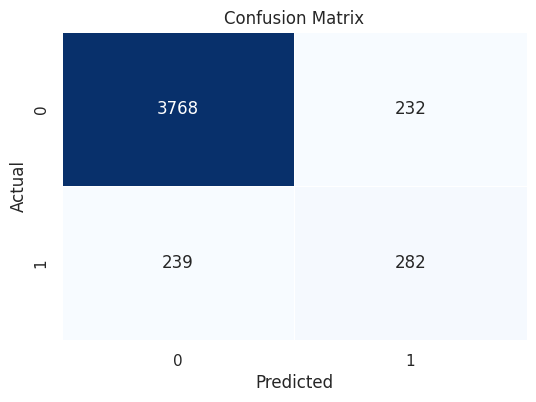

In [208]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [209]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4000
           1       0.55      0.54      0.54       521

    accuracy                           0.90      4521
   macro avg       0.74      0.74      0.74      4521
weighted avg       0.90      0.90      0.90      4521



In [210]:
#
#

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo
model = Sequential()

# Agregar capas a la red neuronal
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # En este caso, 1 neurona y función de activación sigmoide para clasificación binaria

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
accuracy = model.evaluate(X_test, y_test)[1]

print(f'Accuracy on test set: {accuracy}')


Epoch 1/10
1275/1275 [==============================] - 2s 1ms/step - loss: 1.2069 - accuracy: 0.8383 - val_loss: 0.3781 - val_accuracy: 0.8755
Epoch 2/10
1275/1275 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.8606 - val_loss: 0.4543 - val_accuracy: 0.8821
Epoch 3/10
1275/1275 [==============================] - 1s 1ms/step - loss: 0.4762 - accuracy: 0.8654 - val_loss: 0.2833 - val_accuracy: 0.8828
Epoch 4/10
1275/1275 [==============================] - 1s 1ms/step - loss: 0.3997 - accuracy: 0.8720 - val_loss: 0.3138 - val_accuracy: 0.8781
Epoch 5/10
1275/1275 [==============================] - 1s 1ms/step - loss: 0.3982 - accuracy: 0.8725 - val_loss: 0.3262 - val_accuracy: 0.8841
Epoch 6/10
1275/1275 [==============================] - 1s 1ms/step - loss: 0.3423 - accuracy: 0.8774 - val_loss: 0.3072 - val_accuracy: 0.8722
Epoch 7/10
1275/1275 [==============================] - 1s 1ms/step - loss: 0.3300 - accuracy: 0.8801 - val_loss: 0.2790 - val_accuracy:

In [219]:
import tensorflowjs as tfjs

# Guardar el modelo en formato TensorFlow.js
tfjs.converters.save_keras_model(model, 'model')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [211]:
# Evaluar el modelo en el conjunto de prueba
accuracy = model.evaluate(X_test, y_test)[0]

142/142 [==============================] - 0s 939us/step - loss: 0.2729 - accuracy: 0.8876


In [217]:
test_df.sample(10)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
4057,9,1,1,2,374,1,1,1,26,8,128,1,0,0
385,26,1,1,1,335,0,0,0,16,0,104,0,0,0
3278,40,2,1,1,274,0,0,2,18,9,203,1,90,0
4177,38,4,1,3,1300,1,0,1,7,8,335,1,0,0
2569,34,10,1,2,2004,1,0,1,14,8,186,5,0,0
1219,28,1,1,1,582,0,0,2,29,5,199,1,0,0
1157,36,1,1,0,297,0,0,0,12,1,119,1,0,0
4396,22,6,2,1,274,0,0,0,7,8,235,0,256,0
2199,16,0,0,2,421,0,1,0,7,5,195,0,0,0
3465,19,1,1,2,2062,1,0,1,16,6,141,5,0,0


In [220]:
test_data = np.array([
    [22, 6, 2, 1, 274, 0, 0, 0, 7, 8, 235, 0, 256]
])
predictions = model.predict(test_data)
predictions

1/1 [==============================] - 0s 18ms/step


array([[0.32165694]], dtype=float32)

In [ ]:
# Obtener las predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predictions

In [ ]:
test_df.sample(35)

In [ ]:
# # Random Forest model
# RF_clf = RandomForestClassifier(n_estimators=1000, random_state=42)

# # Train the model
# RF_clf.fit(X_train, y_train)

In [ ]:
# # Train Score
# print(RF_clf.score(X_train, y_train))

In [ ]:
# # Test Score
# print(RF_clf.score(X_test, y_test))

In [ ]:
# # Make predictions on the test set
# y_pred = RF_clf.predict(X_test)

In [ ]:
# # Create a confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Visualize the confusion matrix with a heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

In [ ]:
# # Classification Report
# print(classification_report(y_test, y_pred))

## XGBoost Classifier

In [ ]:
# # XGBoost model
# xgb = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=7)

# # Train the model
# xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

In [ ]:
# # Train Score
# print(xgb.score(X_train, y_train))

In [ ]:
# # Test Score
# print(xgb.score(X_test, y_test))

In [ ]:
# # Make predictions on the test set
# y_pred = xgb.predict(X_test)

In [ ]:
# # Create a confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Visualize the confusion matrix with a heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

In [ ]:
# print(classification_report(y_test, y_pred))

## Categorical Boosting Classifier

In [ ]:
# # CatBoostClassifier model
# catboost_clf = CatBoostClassifier(iterations=5000, depth=7, learning_rate=0.01, loss_function='Logloss', random_state=42)

# # Train the model
# catboost_clf.fit(X_train, y_train)

In [ ]:
# # Train Score
# print(catboost_clf.score(X_train, y_train))

In [ ]:
# # Test Score
# print(catboost_clf.score(X_test, y_test))

In [ ]:
# # Make predictions on the test set
# y_pred = catboost_clf.predict(X_test)

In [ ]:
# # Create a confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Visualize the confusion matrix with a heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

In [ ]:
# print(classification_report(y_test, y_pred))

## Light Gradient Boosting

In [ ]:
# # Create an LGBMClassifier
# lgbm_clf = LGBMClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)

# # Train the model
# lgbm_clf.fit(X_train, y_train)

In [ ]:
# # Train Score
# print(lgbm_clf.score(X_train, y_train))

In [ ]:
# Test Score
print(lgbm_clf.score(X_test, y_test))

In [ ]:
# Make predictions on the test set
y_pred = lgbm_clf.predict(X_test)

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))